### scikt-learn多项式回归 Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# 先对原始数据进行处理，添加新的特征
poly  = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
# 数据处理完成后使用线性回归进行模型训练
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2,y)
y_predict = lin_reg.predict(X2)

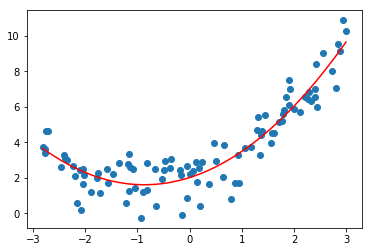

In [6]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],"r")

### 关于PolynomialFeatures

In [7]:
X = np.arange(1,11).reshape(-1,2)

In [8]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 =poly.transform(X)

### Pipeline 
将多项式处理 数据归一化 模型处理组织到一起统一处理

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [10]:
pipeline = Pipeline([
    ("poly",PolynomialFeatures(degree=2)), # 多项式处理
   ("std_scaler",StandardScaler()), # 归一化处理
    ("liin_reg",LinearRegression()) # 模型训练
])

In [11]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)
pipeline.fit(X,y)
pipeline_predict = pipeline.predict(X)

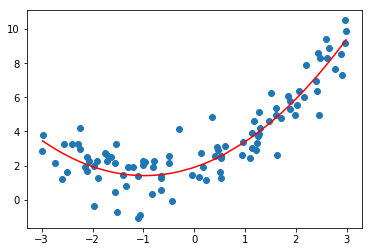

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x),pipeline_predict[np.argsort(x)],"r")